## Subsetting a raster image using shape file


The `shapefile format` is a geospatial vector data format for geographic information system (GIS) software. It is developed and regulated by **Esri** as a mostly open specification for data interoperability among Esri and other GIS software products. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Simple_vector_map.svg/500px-Simple_vector_map.svg.png"
width="50%"></img>

The shapefile format can spatially describe vector features: points, lines, and polygons, representing, for example, water wells, rivers, and lakes. Each item usually has attributes that describe it, such as name or temperature.

We can subset a raster image to a specific country/region using a Shapefile. Let's download the shape file for India from [here](https://www.diva-gis.org/datadown).

First we load all the required libraries and then load the raster/tif image of the night light images downloaded from [here](https://eogdata.mines.edu/dmsp/downloadV4composites.html)

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import pathlib
import os
import matplotlib.pyplot as plt
from plotnine import *
import re

We are using the `rasterio` library to achieve the target. 

Geographic information systems use GeoTIFF and other formats to organize and store gridded, or raster, datasets. Rasterio reads and writes these formats and provides a Python API based on N-D arrays.

In [7]:
import rasterio
from rasterio.plot import show


def get_image(path):
    p = path #"data\F182013.v4\F182013.v4c_web.avg_vis.tif\F182013.v4c_web.avg_vis.tif"
    fp = os.path.abspath(os.path.join( "./../../", p))
    src = rasterio.open(fp)
    #img = src.read(1)
    #fig, ax = plt.subplots(figsize=(18, 10))
    #ax.imshow(img[4000:9000 , 28000:35000 ], cmap='pink')
    return src
    #show(img)

In [8]:
im2013 = get_image("data\F182013.v4\F182013.v4c_web.avg_vis.tif\F182013.v4c_web.avg_vis.tif")

Let's take a look at the original image.

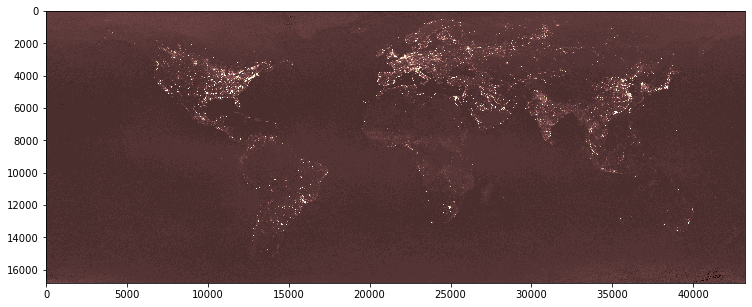

In [24]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.imshow(im2013.read(1), cmap='pink')

We see that the original image has data for the entire world. But we want to extract data only for India. Therefore we read in the shape file we have downloaded and keep only the `geometry` field as that contains the boundary coordinates.

In [4]:
import fiona
import rasterio
import rasterio.mask

with fiona.open("./../../data/IND_adm/IND_adm0.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

Now we use the shapes extracted to create a raster mask. The key piece of code here is ` rasterio.mask.mask`. We pass the image and the shape file to the function. It returns the extracted image and the transformation that it applied.

In [9]:
out_image, out_transform = rasterio.mask.mask(im2013, shapes, crop=True)
out_meta = im2013.meta

Now lets look at the subset/selected image.

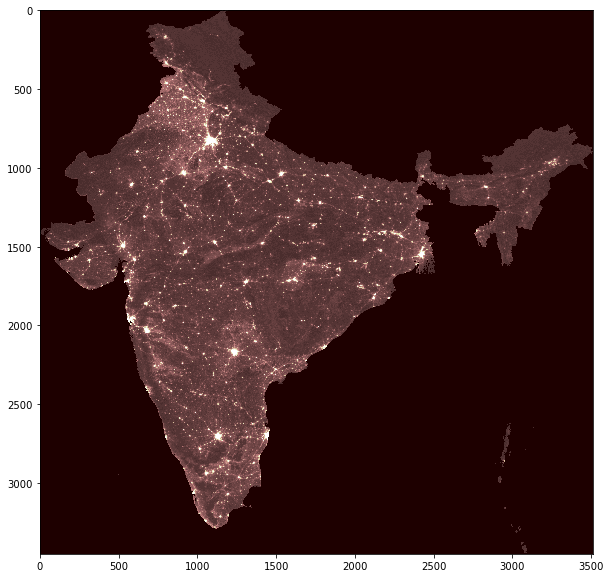

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(out_image[0 , : , :] , cmap='pink')

Great! thanks to rasterio we are able to subset in just a few lines of code